# 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

%matplotlib inline

# 데이터 업로드

In [2]:
df_train = pd.read_csv("../input/mnist-in-csv/mnist_train.csv")
df_test = pd.read_csv("../input/mnist-in-csv/mnist_test.csv")
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 데이터 전처리

In [3]:
df_train.shape

(60000, 785)

In [4]:
df_test.shape

(10000, 785)

In [5]:
X_t = df_train.drop(["label"], axis=1)
Y_t = df_train.label.values

In [6]:
X_test = df_test.drop(["label"], axis=1)
Y_test = df_test.label.values

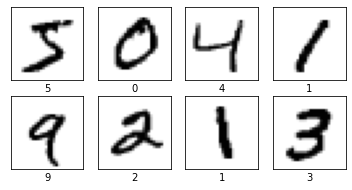

In [7]:
# 8개의 데이터만 시각화해보기
plt.figure(figsize=(6,3))
X = X_t.to_numpy().reshape(60000, 28, 28)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(str(Y_t[i]))
plt.show()

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X_t, Y_t, test_size=0.2, stratify = Y_t, random_state = 42)

In [9]:
print(X_train.shape, Y_train.shape)

(48000, 784) (48000,)


In [10]:
X_train.values.dtype

dtype('int64')

In [11]:
X_train = X_train.astype("float64")/255
X_val = X_val.astype("float64")/255
X_test = X_test.astype("float64")/255

In [12]:
Y_train[0]

1

In [13]:
# one hot encoding
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val, 10)
Y_test = to_categorical(Y_test, 10)

In [14]:
Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 모델 생성

In [15]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train,
          batch_size=200,
          epochs=30,
          verbose=1, 
          validation_data=(X_val, Y_val))

Epoch 1/30
240/240 [==============================] - 3s 13ms/step - loss: 0.3295 - accuracy: 0.9086 - val_loss: 0.1935 - val_accuracy: 0.9453
Epoch 2/30
240/240 [==============================] - 2s 8ms/step - loss: 0.1378 - accuracy: 0.9610 - val_loss: 0.1275 - val_accuracy: 0.9632
Epoch 3/30
240/240 [==============================] - 2s 8ms/step - loss: 0.0922 - accuracy: 0.9732 - val_loss: 0.1048 - val_accuracy: 0.9707
Epoch 4/30
240/240 [==============================] - 2s 8ms/step - loss: 0.0672 - accuracy: 0.9808 - val_loss: 0.0937 - val_accuracy: 0.9707
Epoch 5/30
240/240 [==============================] - 2s 8ms/step - loss: 0.0509 - accuracy: 0.9859 - val_loss: 0.0894 - val_accuracy: 0.9710
Epoch 6/30
240/240 [==============================] - 2s 9ms/step - loss: 0.0390 - accuracy: 0.9894 - val_loss: 0.0835 - val_accuracy: 0.9753
Epoch 7/30
240/240 [==============================] - 2s 8ms/step - loss: 0.0302 - accuracy: 0.9922 - val_loss: 0.0781 - val_accuracy: 0.9756
Epoch

In [18]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07757582515478134
Test accuracy: 0.98089998960495
